In [1]:
#importing required libraries 
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score 
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
boston=load_boston()
dfx = pd.DataFrame(boston.data, columns=boston.feature_names) #original boston dataset
dfy = pd.DataFrame(boston.target, columns=["MEDV"]) #load target attribute and make MEDV dataset
df = pd.concat([dfx, dfy], axis=1) #combine original boston dataset and MEDV dataset
df = pd.DataFrame(df)

In [3]:
#declaring varibles for passing into model
x=df.iloc[:,:-1] #independent variables 
y=df.iloc[:,-1] #dependent variables

In [4]:
#model ie linearregression, ridge regression and lasso regression
lr=LinearRegression()
ridge=Ridge()
lasso=Lasso()

to know which will be generalized model 

In [5]:
#for linear regression
mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769924


In [10]:
#for ridge regression
parameters={'alpha':[10e-15,1e-10,1e-8,1,5,10,13,15,20,25,60,80,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540365


In [7]:
#for lasso regression
parameters={'alpha':[10e-15,1e-10,1e-8,1,5,10,13,15,20,25,60,80,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3233.714755544802, tolerance: 3.919148542079209
  positive)
C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2759.6664933534585, tolerance: 3.3071316790123473
  positive)
C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3546.5896462768246, tolerance: 2.813643886419753
  positive)
C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

{'alpha': 1}
-35.53158022069486


C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1764.7912238672375, tolerance: 2.8821090464396293
  positive)
C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1782.0199428990577, tolerance: 2.764448730650155
  positive)
C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2760.130153619431, tolerance: 2.710494922600619
  positive)
C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

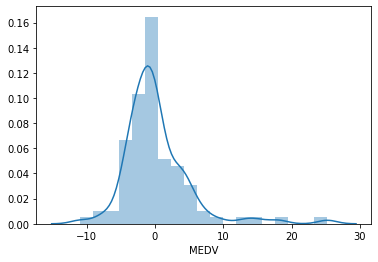

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lasso_regressor.fit(x_train,y_train)
predict=lasso_regressor.predict(x_test)
sns.distplot(y_test-predict)